# Анализ оттока клиентов банка  

**Описание исследования**  

Банк располагается в Ярославле, Ростове и Рыбинске. Со временем клиентская база банка изменилась и увеличился отток клиентов. Отдел маркетинка банка просит проанализировать клиентов и выделить отточные сегменты.  

**Цель исследования**  

На основании всех значимых признаков отточности клиентов, необходимо сформировать сегменты пользователей, выделить сегменты с наибольшей отточностью, презентовать результаты для отдела маркетинга и дать рекомендации которые помогут менеджеру банка уменьшить отток клиентов.  

**Задачи исследования**  

1. Загрузка и изучение общей информации  
    1.1. Импорт библиотек  
    1.2. Загрузка данных  
    1.3. Ознакомление с данными  
2. Предобработка данных  
    2.1. Приведение названия столбцов к общему виду    
    2.2. Проверка и обработка пропусков и дубликатов  
    2.3. Обработка типов данных  
    2.4. Проверка и обработка выбросов  
    2.5. Промежуточный вывод по разделу  
3. Исследовательский анализ данных  
    3.1. Анализ данных в разрете оттока  
    3.2. Анализ портрета клиентов в разрезе оттока  
    3.3. Корреляционный анализ  
    3.4. Промежуточный вывод по разделу  
4. Проверка статистических гипотез    
    4.1. Гипотеза № 1  
    4.2. Гипотеза № 2  
    4.3. Промежуточный вывод по разделу  
5. Вывод по EDA анализу, корреляции и гипотезам  
6. Сегментация и приоритизация клиентов  
    6.1. Составление 3 сегментов отточных пользователей  
    6.2. Приоритизация отточных сегментов клиентов  
7. Общий вывод и рекомендации

## Загрузка и изучение общей информации

### Импорт библиотек

In [2]:
import pandas as pd
import scipy.stats as stats
from scipy import stats as st
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import math as mth
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from phik import phik_matrix
from scipy.stats import levene

Настроим вывод данных

In [4]:
pd.set_option('display.float_format', '{:.2f}'.format)

### Ознакомление с данными

In [5]:
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Посмотрим уникальные значения

In [7]:
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

### Промежуточный вывод по разделу

В датафрейме мы видим 10000 строк.  
Пропуски только в двух колонках - age и balance.  
Всего в датафрейме 3 города.

## Предобработка данных

### Приведение названия столбцов к общему виду

In [8]:
data.rename(columns={'USERID': 'user_id', 'EST_SALARY': 'est_salary'}, inplace=True)
data

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.00,Рыбинск,М,27.00,1,78144.65,1,0,1,18943.64,0
9996,139170,894.00,Ярославль,М,46.00,0,NaN,1,1,0,196898.29,0
9997,115639,903.00,Ярославль,М,24.00,0,NaN,2,1,1,108905.09,0
9998,148700,777.00,Ярославль,Ж,68.00,3,865457.97,3,0,1,86874.90,0


### Проверка и обработка пропусков и дубликатов

#### Проверка и обработка пропусков

Проверим какой процент пропусков в 'age'

In [9]:
data['age'].isna().sum() / len(data['age']) * 100

0.26

Процент пропусков слишком мал, эти строки можем либо заполнить средним значением, либо удалить. В данном случае я удалю их

In [10]:
data = data.dropna(subset=['age']).reset_index(drop=True)
data['age'].isna().sum() # Выведем количество пропусков

0

Проверим какой процент пропусков в 'balance'

In [11]:
round(data['balance'].isna().sum() / len(data['balance']) * 100, 1)

22.8

Выясним, есть ли зависимость пропусков от других данных.  
Cоздадим столбец 'miss_balance' со значениями 0 если значение в 'balance' заполнено и 1 если нет

In [12]:
data['miss_balance'] = data['balance'].isna().astype(int)
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,miss_balance
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1,0
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0,1
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1,0
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1,0


In [13]:
miss_balance_0 = data.query('miss_balance == 0')
miss_balance_1 = data.query('miss_balance == 1')
miss_balance_table = pd.DataFrame(columns=['Значение пропущено', 'Значение не пропущено', 'Относительная разница'], 
                                  index=['Средняя зарплата', 'Средний возраст', 'Медианное количество продуктов', 
                                         'Медианное количество собственности', 'Мода по городу', 'Мода по полу'])

i = -1
for index in miss_balance_table.index:
    columns_to_fill = ['est_salary', 'age', 'products', 'equity', 'city', 'gender']
    agg_func = [lambda x: round(x.mean(), 1), lambda x: round(x.mean(), 1),
                lambda x: round(x.median(), 1), lambda x: round(x.median(), 1),
                lambda x: x.mode()[0], lambda x: x.mode()[0]]
    i = (i + 1) % len(agg_func)
    
    # Рассчет среднего для зарплаты и возраста
    if index == 'Мода по городу' or index == 'Мода по полу':
        miss_balance_table.loc[index, 'Значение пропущено'] = agg_func[i](miss_balance_1[columns_to_fill[i]])
        miss_balance_table.loc[index, 'Значение не пропущено'] = agg_func[i](miss_balance_0[columns_to_fill[i]])
        continue
    
    # Рассчет для других столбцов
    for column in miss_balance_table.columns:
        miss_balance_table.loc[index, 'Значение пропущено'] = agg_func[i](miss_balance_1[columns_to_fill[i]])
        miss_balance_table.loc[index, 'Значение не пропущено'] = agg_func[i](miss_balance_0[columns_to_fill[i]])
        miss_balance_table.loc[index, 'Относительная разница'] = (
            (agg_func[i](miss_balance_1[columns_to_fill[i]]) - agg_func[i](miss_balance_0[columns_to_fill[i]])) /
            agg_func[i](miss_balance_0[columns_to_fill[i]]))

In [14]:
miss_balance_table

,Значение пропущено,Значение не пропущено,Относительная разница
Средняя зарплата,226345.40,124520.40,0.82
Средний возраст,42.10,42.90,-0.02
Медианное количество продуктов,1.00,2.00,-0.50
Медианное количество собственности,0.00,4.00,-1.00
Мода по городу,Ярославль,Ярославль,NaN
Мода по полу,М,Ж,NaN


Количество пропусков в столбце balance почти 23% и мы видим зависимость со столбцом equity.  
В данном случае считаю, что заполнение средним значением или медианой или удаление всех данных может привести к искажению результатов исследования.

#### Проверка и обработка дубликатов

Проверим есть ли дубликаты в user_id

In [15]:
data['user_id'].duplicated().sum()

50

In [16]:
data[data['user_id'].duplicated(keep=False)].sort_values(by='user_id').head(20)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,miss_balance
1892,116540,883.00,Рыбинск,Ж,55.00,1,362756.49,3,0,1,175920.48,1,0
7683,116540,887.00,Ярославль,Ж,38.00,0,NaN,1,0,1,119247.61,0,1
4862,117943,855.00,Рыбинск,Ж,32.00,6,1036832.93,4,1,1,107792.71,1,0
7531,117943,880.00,Ярославль,Ж,40.00,0,NaN,1,1,0,137718.93,0,1
5856,120258,908.00,Рыбинск,Ж,38.00,4,2213581.63,2,0,1,160327.77,1,0
5889,120258,905.00,Ярославль,М,30.00,0,NaN,1,1,1,146427.96,0,1
1410,123461,829.00,Ярославль,Ж,59.00,0,96222.44,2,0,1,102771.55,1,0
8621,123461,934.00,Рыбинск,М,34.00,0,NaN,2,1,0,291619.27,0,1
9750,124450,758.00,Рыбинск,Ж,36.00,0,73574.07,2,0,1,79963.59,0,0
8151,124450,859.00,Ярославль,Ж,38.00,6,516811.20,1,1,1,95144.63,1,0


Мы видим, что один id присвоен разным людям, поэтому удалять дубликаты нельзя.

### Обработка типов данных

Изменим тип данных в age

In [17]:
data['age'] = data['age'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9974 entries, 0 to 9973
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
 12  miss_balance   9974 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 1013.1+ KB


### Проверка и обработка выбросов

In [18]:
box_to_fill = ['score', 'age', 'equity', 'balance', 'products', 'est_salary'] # список для проверки на выбросы

def box(column): # функция для вывода диаграмм размаха
    sns.boxplot(x=column, data=data)
    plt.title('Диаграмма размаха')
    plt.ylabel('Значение')
    plt.show();

Построим диаграммы с выбросами

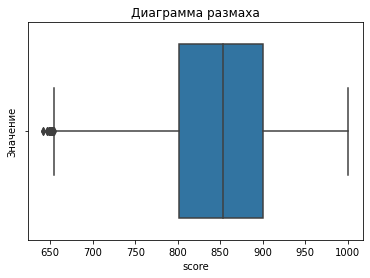

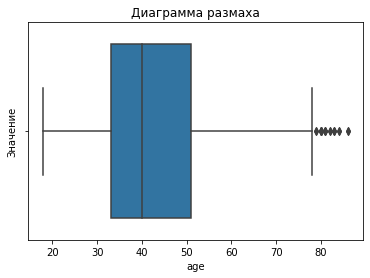

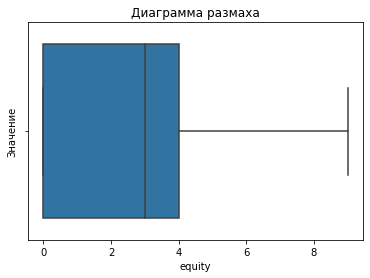

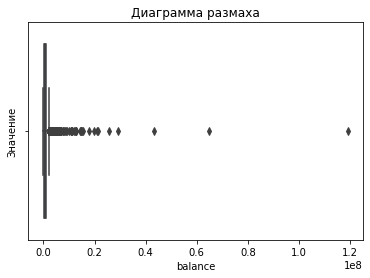

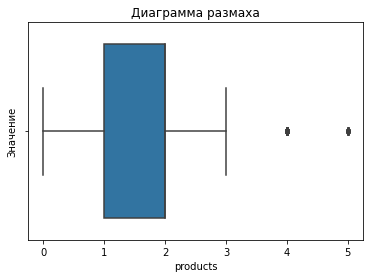

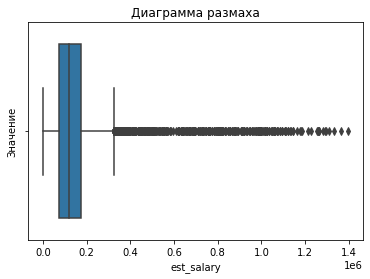

In [19]:
for i in box_to_fill:
    box(i)

In [20]:
data.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,miss_balance
count,9974.00,9974.00,9974.00,9974.00,7695.00,9974.00,9974.00,9974.00,9974.00,9974.00,9974.00
mean,171755.22,848.68,42.73,2.63,827245.59,1.87,0.68,0.52,147786.81,0.18,0.23
std,33695.53,65.40,12.18,1.98,1980327.41,0.79,0.47,0.50,139285.51,0.39,0.42
min,94561.00,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00,0.00
25%,142760.00,802.00,33.00,0.00,295698.71,1.00,0.00,0.00,75251.66,0.00,0.00
50%,172643.00,853.00,40.00,3.00,524295.33,2.00,1.00,1.00,119626.79,0.00,0.00
75%,201163.75,900.00,51.00,4.00,980051.21,2.00,1.00,1.00,174499.81,0.00,0.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00,1.00


На графиках мы можем видеть большие выбросы только в balance и est_salary.  
Я считаю, что зарплата и баланс на счете это индивидуальные показатели и удалять такие строки не нужно.

### Промежуточный вывод по разделу

В данном разделе:  
- названия столбцов user_id и est_salary приведены к общему виду  
- удалены пропуски из столбца age, т.к. количество пропусков слишком мало - всего 0.26%  
- пропуски в столбце balance имеют тип - MNAR, т.к. мы видим зависимость со столбцом equity. В данном случае считаю, что заполнение средним значением или медианой или удаление всех данных может привести к искажению результатов исследования  
- выявлено, что в столбце balance 22.8% пропусков от всех данных  
- найдены дубликаты в user_id, но мы видим, что один id присвоен разным людям, поэтому удалять их нельзя  
- изменён тип данных в age с float на int  
- выполнена кодировка столбцов gender и city

## Исследовательский анализ данных

### Анализ данных в разрезе оттока

Создадим функции для анализа распределения данных оттока по непрерывным и дискретным данным.

In [23]:
# Функция для анализа распределения данных оттока по непрерывным данным
def continuous(data, column, xlim=None, bins=None):
    # Настроим палитру графика
    sns.set_palette('deep')
    # Задаем размер графика
    plt.figure(figsize=(15,7))
    # Строим график
    sns.histplot(data=data,
        x=column,
        bins=bins if bins is not None else 50,
        stat='density',
        common_norm=False,
        hue='churn',
        kde=True)
    # Настраиваем заголовок и названия осей
    plt.title(f'Распределение данных оттока по признаку {column}', fontsize=16)
    plt.tick_params(labelsize=14)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Плотность', fontsize=14)
    # Зададим пределы оси
    if xlim:
        plt.xlim(xlim)
    # Выводим график
    plt.show()

In [24]:
# Функция для анализа распределения данных оттока по дискретным данным
def discrete(data, column):
    # Настроим палитру графика
    sns.set_palette('pastel')
    # Задаем размер графика
    plt.figure(figsize=(15,7))
    # Строим график
    sns.barplot(data=data,
        x=column,
        y='churn')
    # Настраиваем заголовок и названия осей
    plt.axhline(y=data['churn'].mean(), color='red', linestyle='--') # средний уровень оттока 15%
    plt.title(f'Распределение данных оттока по признаку {column}', fontsize=16)
    plt.tick_params(labelsize=14)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Отток', fontsize=14)
    plt.grid(True)
    # Форматируем значения на оси y в проценты
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    # Выводим график
    plt.show()

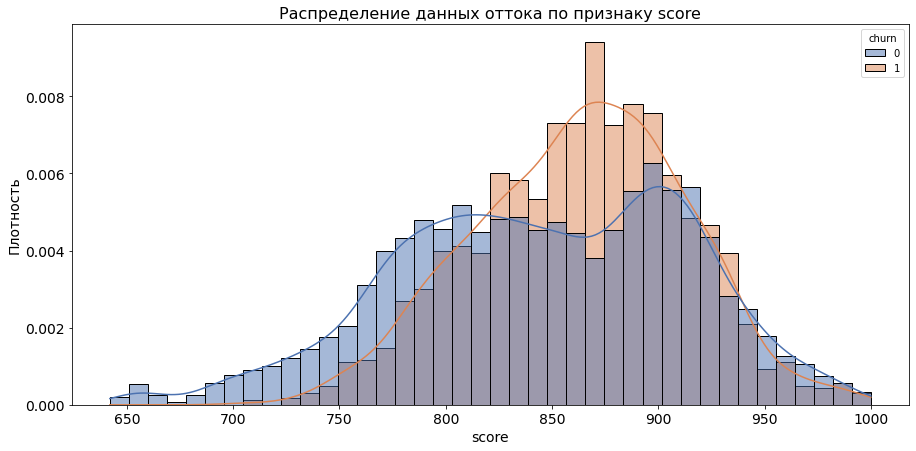

In [25]:
continuous(data, 'score', bins=40)

Отток клиентов по признаку score находится в диапазоне значений 820-940

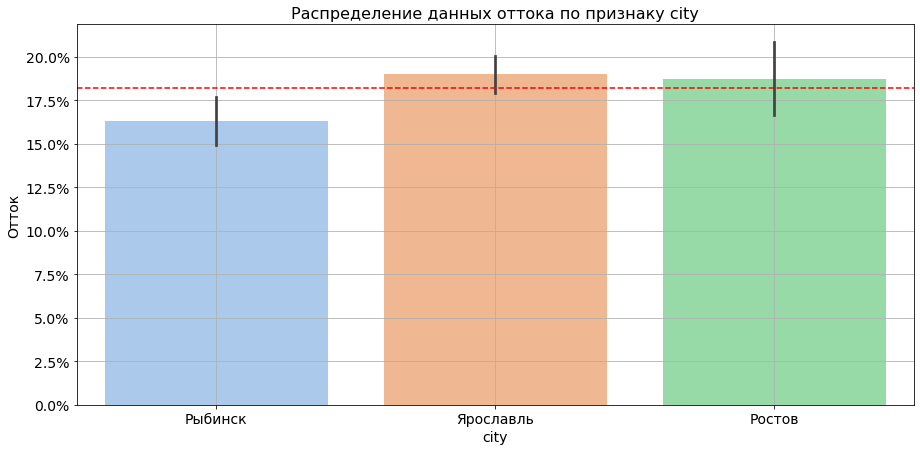

In [26]:
discrete(data, 'city')

В части городов, отток клиентов в Рыбинске ниже среднего значения, в остальных городах отток выше среднего уровня оттока. Ярославль находится на первом месте по оттоку.

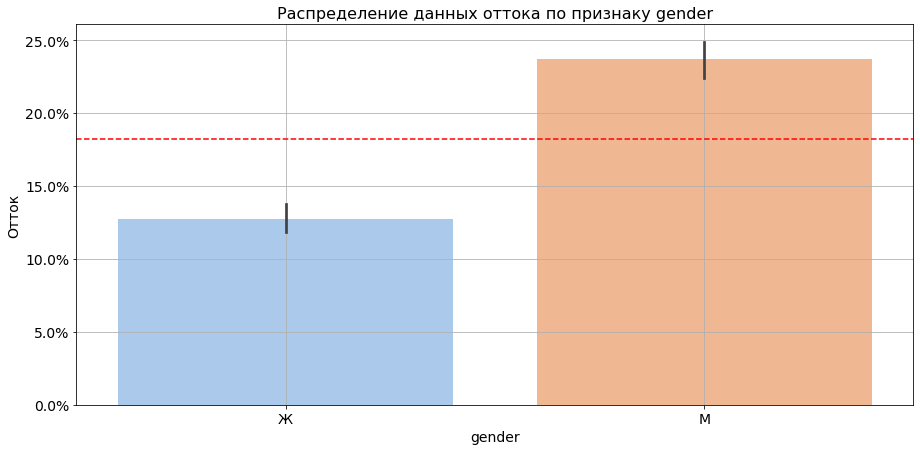

In [27]:
discrete(data, 'gender')

В части пола, отток мужчин около 24%, в то время как женщин 13% и вляется ниже среднего.

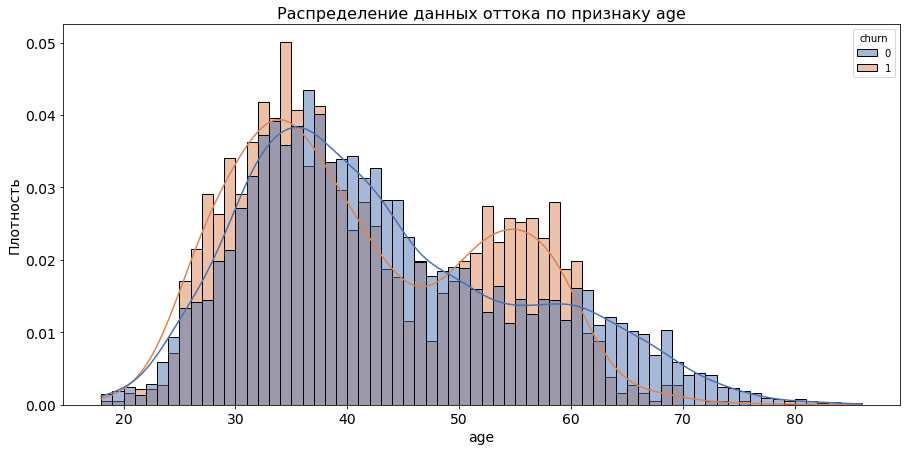

In [28]:
continuous(data, 'age', bins=68)

Отток клиентов по возрасту виден в двух диапазонах: с 25 до 36 и с 50 до 61.

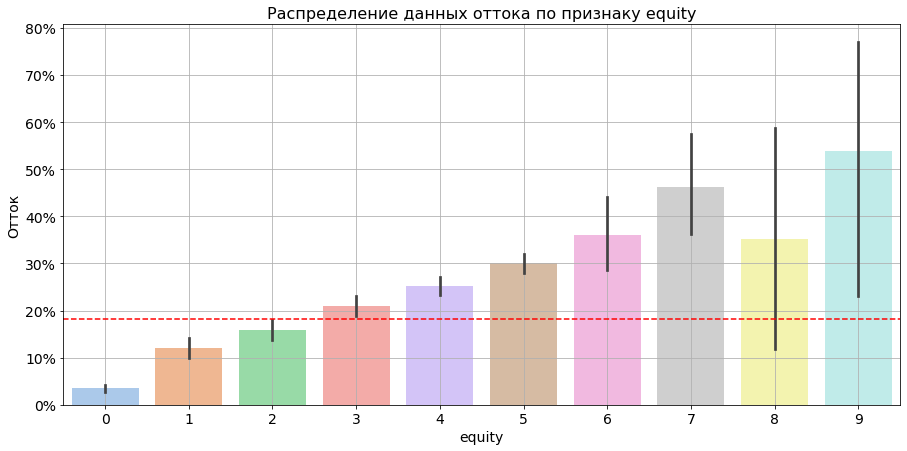

In [29]:
discrete(data, 'equity')

В части признака equity (баллов собственности) отток клиентов выше средних значений начинается с 3 баллов.

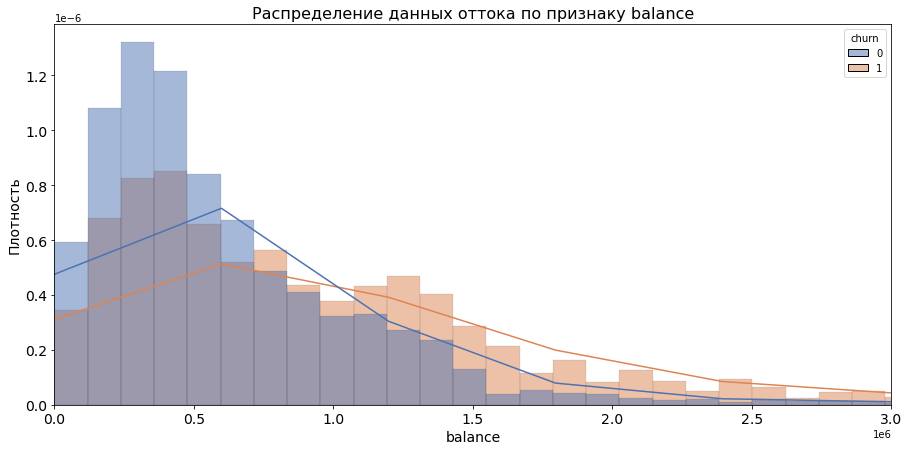

In [30]:
continuous(data, 'balance', xlim=(0, 3e6), bins=1000)

Отток клиентов в признаке balance начинается с 700 тыс.

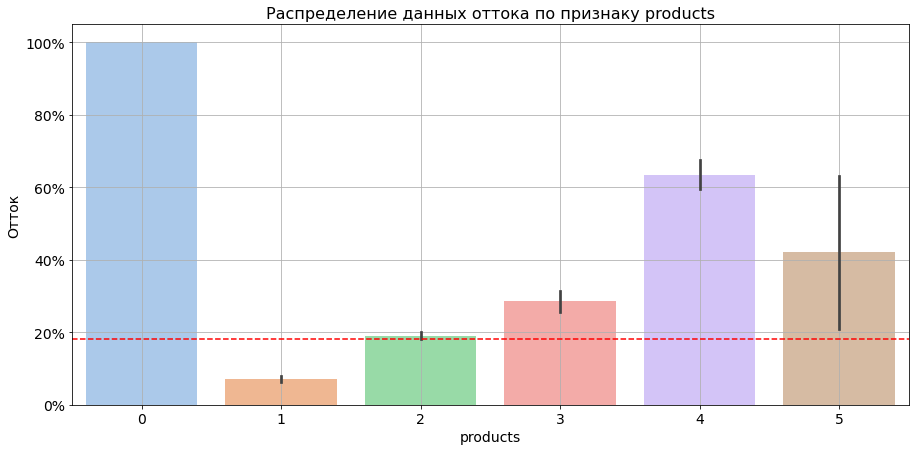

In [31]:
discrete(data, 'products')

Посмотрим на клиентов с количеством продуктов 0

In [32]:
data.query('products == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,miss_balance
8939,147837,962.00,Рыбинск,Ж,79,3,NaN,0,0,0,25063.96,1,1


Удалим этого клиента

In [33]:
data = data.drop(index=8939)

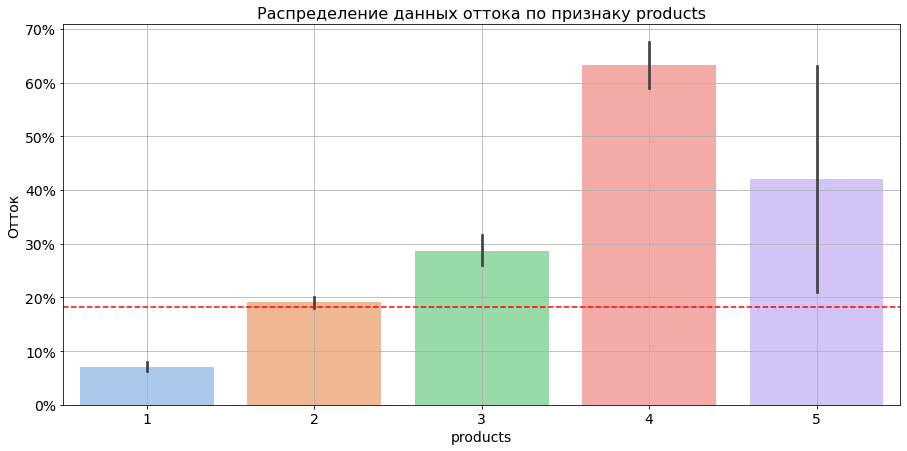

In [34]:
discrete(data, 'products')

С 0 продуктов всего 1 человек, эти данные мы удалили.  
При наличии у клиентов 2 и более продуктов отток клиентов находится выше среднего.  
У клиентов с 4 продуктами отток составляет более 60%.

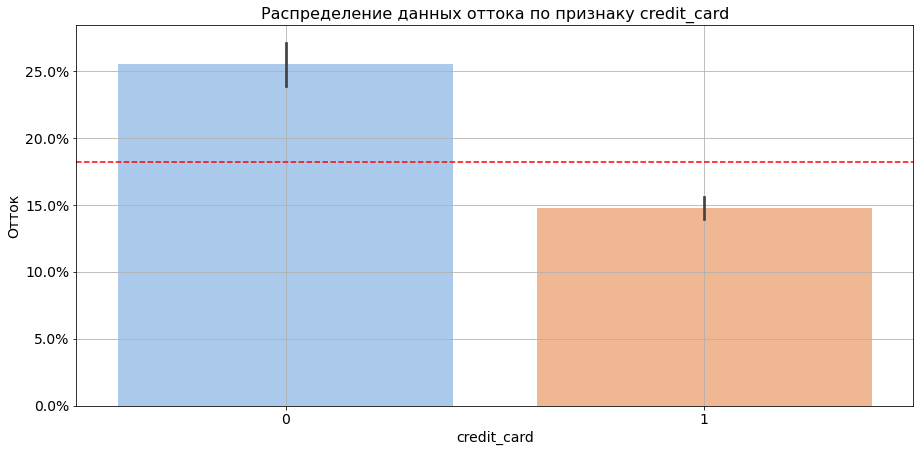

In [35]:
discrete(data, 'credit_card')

Среди клиентов у которых нет кредитной карты отток составляет более 25%. Отток клиентов с кредитной картой меньше среднего и находится чуть ниже 15%.

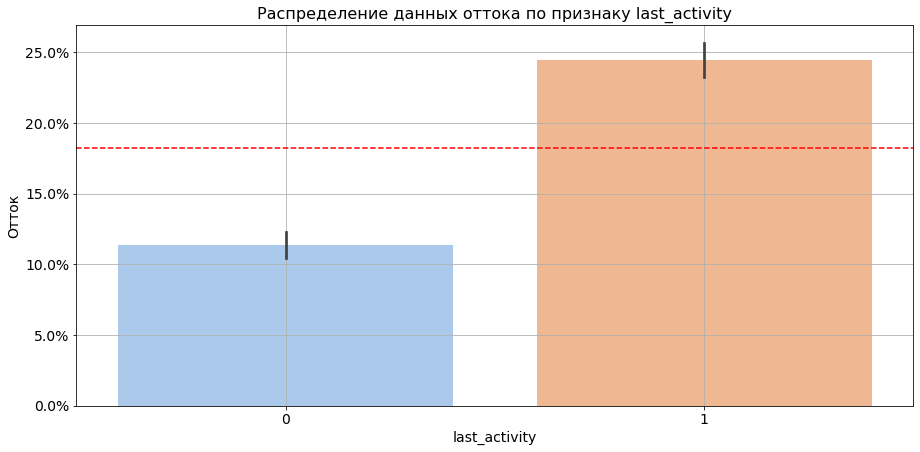

In [36]:
discrete(data, 'last_activity')

Отток активных клиентов около 24%.

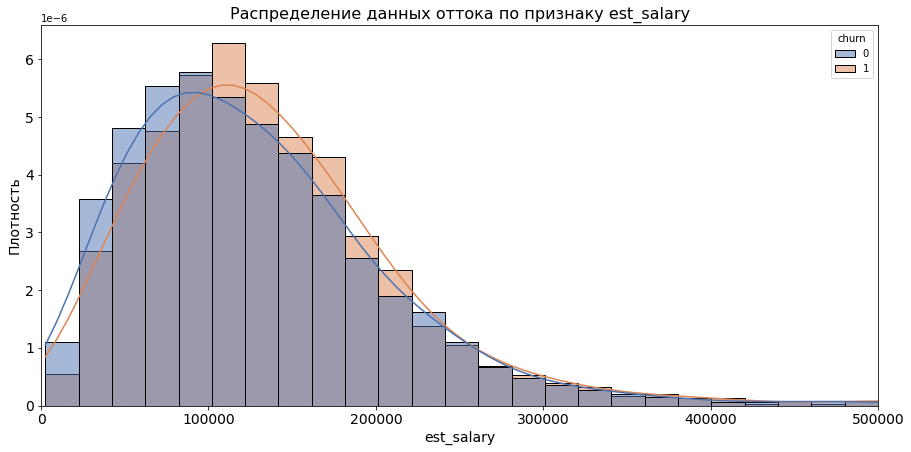

In [37]:
continuous(data, 'est_salary', xlim=(0, 0.5e6), bins=70)

Наибольший отток клиентов в части esl_salary (доход клиента) назодится в диапазоне 100-220 тыс.

### Корреляционный анализ

Построим матрицу phik

In [38]:
interval_cols = ['score', 'age', 'balance', 'est_salary'] # создадим список непрерывных признаков
pm = phik_matrix(data.iloc[:, 1:], interval_cols=interval_cols) # создадим матрицу
pm

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,miss_balance
score,1.00,0.09,0.07,0.03,0.53,0.17,0.42,0.21,0.05,0.40,0.23,0.75
city,0.09,1.00,0.01,0.09,0.06,0.04,0.13,0.07,0.03,0.17,0.02,0.04
gender,0.07,0.01,1.00,0.29,0.06,0.05,0.07,0.20,0.01,0.14,0.22,0.10
age,0.03,0.09,0.29,1.00,0.05,0.02,0.14,0.16,0.09,0.36,0.19,0.05
equity,0.53,0.06,0.06,0.05,1.00,0.00,0.58,0.22,0.05,0.29,0.35,0.98
balance,0.17,0.04,0.05,0.02,0.00,1.00,0.00,0.00,0.00,0.37,0.02,NaN
products,0.42,0.13,0.07,0.14,0.58,0.00,1.00,0.27,0.11,0.22,0.26,0.49
credit_card,0.21,0.07,0.20,0.16,0.22,0.00,0.27,1.00,0.05,0.04,0.20,0.24
last_activity,0.05,0.03,0.01,0.09,0.05,0.00,0.11,0.05,1.00,0.04,0.26,0.04
est_salary,0.40,0.17,0.14,0.36,0.29,0.37,0.22,0.04,0.04,1.00,0.05,0.43


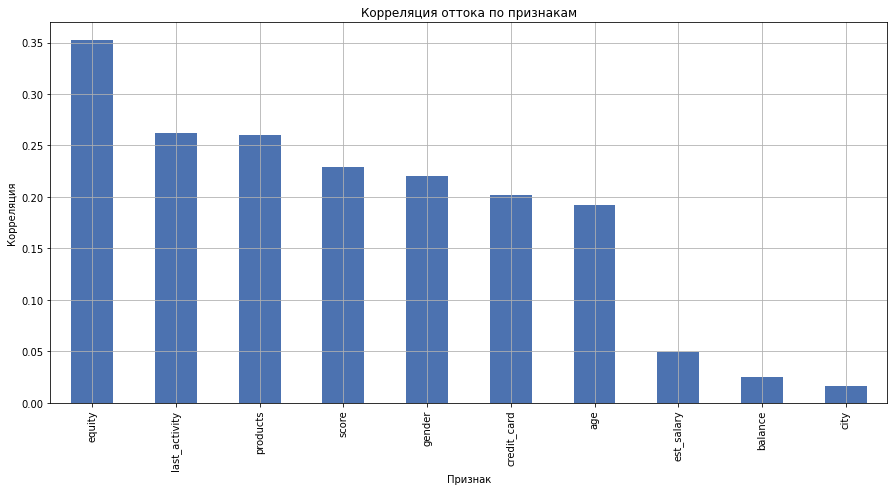

In [39]:
pm_drop_churn = (
    pm['churn']
    .drop(['churn', 'miss_balance'])
    .sort_values(ascending=False)
    .plot(kind='bar', grid=True, figsize=(15, 7),
        title='Корреляция оттока по признакам',
        xlabel='Признак', ylabel='Корреляция')
)
pm_drop_churn;

**Шкала Чеддока**
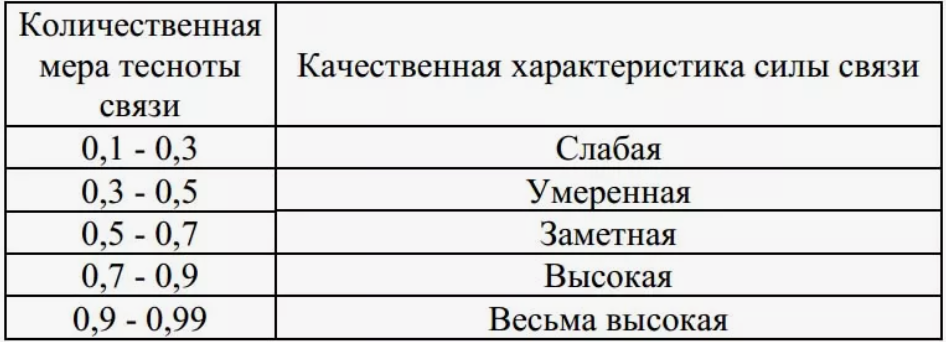

По шкале Чеддока корреляция оттока не имеет связей с est_salary, balance и city.  
Слабая связь выявлена с last_activity (0.26), products (0.26), score (0.23), gender (0.22), credit_card (0.2) и age (0.19).  
Умеренная связь выявлена с equity (0.35).

### Анализ портрета клиента в разрезе оттока

Сгруппируем таблицу для формирования портрета клиента в разрезе оттока.

In [40]:
churn_group = (
    data.groupby('churn')
    .agg({
        'score': 'mean',
        'age': 'median',
        'balance': ['mean', 'median'],
        'est_salary': ['mean', 'median'],
        'equity': 'median',
        'products': 'median',
        'credit_card': 'mean',
        'last_activity': 'mean',
        'city': lambda x: x.mode()[0],
        'gender': lambda x: x.mode()[0]})
    .T
    .rename(index={'<lambda>': 'mode'})
    .reset_index()
    .rename(columns={'level_0': 'column', 'level_1': 'agg', 0: 'не отток', 1: 'отток'}))

for index in churn_group.index: # Добавим столбец с относительной разницей
    if churn_group.loc[index, 'agg'] == 'mean' or churn_group.loc[index, 'agg'] == 'median':
        churn_group.loc[index, 'относительная разница'] = (
            (churn_group.loc[index, 'отток'] - churn_group.loc[index, 'не отток']) / churn_group.loc[index, 'не отток'])

churn_group

churn,column,agg,не отток,отток,относительная разница
0,score,mean,845.40,863.36,0.02
1,age,median,40,39,-0.03
2,balance,mean,733031.63,1134458.21,0.55
3,balance,median,475410.09,783908.90,0.65
4,est_salary,mean,147674.64,148357.48,0.00
5,est_salary,median,118227.60,125408.88,0.06
6,equity,median,3,4,0.33
7,products,median,2,2,0.00
8,credit_card,mean,0.71,0.55,-0.22
9,last_activity,mean,0.48,0.70,0.45


Основываясь на таблицу, мы можем сказать, что клиенты с балансом 783+ тыс больше склонны к оттоку.  
Также клиенты мужского пола и с 4 баллами собственности находятся в большей зоне риске на отток.  
По остальным признакам различия минимальны, либо их нет.

### Промежуточный вывод по разделу

В данном разделе было выявлено:  
- отток клиентов по признаку score находится в диапазоне значений 820-940.  
- в части городов, отток клиентов в Рыбинске ниже среднего значения, в остальных городах отток выше среднего уровня оттока. Ярославль находится на первом месте по оттоку.  
- в части пола, отток мужчин около 24%, в то время как женщин 13% и вляется ниже среднего.  
- отток клиентов по возрасту виден в двух диапазонах: с 25 до 36 и с 50 до 61.  
- в части признака equity (баллов собственности) отток клиентов выше средних значений начинается с 3 баллов.  
- отток клиентов в признаке balance начинается с 700 тыс.  
- при наличии у клиентов 2 и более продуктов отток клиентов находится выше среднего. У клиентов с 4 продуктами отток составляет более 60%.  
- среди клиентов у которых нет кредитной карты отток составляет более 25%. Отток клиентов с кредитной картой меньше среднего и находится чуть ниже 15%.  
- отток активных клиентов около 24%.  
- наибольший отток клиентов в части esl_salary (доход клиента) назодится в диапазоне 100-220 тыс.  
- По шкале Чеддока корреляция оттока не имеет связей с est_salary, balance и city.  
Слабая связь выявлена с last_activity (0.26), products (0.26), score (0.23), gender (0.22), credit_card (0.2) и age (0.19).  
Умеренная связь выявлена с equity (0.35).

## Проверка статистических гипотез

### Гипотеза № 1

H0: Доход активных клиентов равен доходу ушедших клиентов.  
H1: Доход у активных и ушедших клиентов различается. 

Создадим срезы дохода по активным и ушедшим клиентам

In [41]:
est_active = data.query('churn == 1')['est_salary']
est_not_active = data.query('churn == 0')['est_salary']

Выполним тест Левене для проверки гипотезы о равенстве дисперсий  

H0: Распределения групп est_active и est_not_active однородны  
H1: Распределения групп est_active и est_not_active неоднородны

In [42]:
stats, results = levene(est_active, est_not_active)

alpha = 0.05  # критический уровень статистической значимости

if results < alpha:
    print("Отвергаем нулевую гипотезу: распределения неоднородны.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: распределения однородны.")

Отвергаем нулевую гипотезу: распределения неоднородны.


- При проведении теста Леване на однородность дисперсий, мы отвергли эту гипотезу. Дисперсии различаются.  
- В п.2.4. на диаграмме размаха по доходу мы видели много выбросов.  

t-test предполагает наличие одинаковых дисперсий, а также при наличии выбросов t-test может давать искаженные результаты.  
На основании этих фактов для проверки нашей гипотезы мы будем использовать тест Манна-Уитни.

In [43]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(est_active, est_not_active)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:  0.00016830729188229058
Отвергаем нулевую гипотезу: разница статистически значима


По результатам теста отвергаем нулевую гипотезу. Можно сказать, что доход ушедших клиентов не равен доходу активных клиентов.

### Гипотеза № 2

H0: Среднее количество баллов собственности у отточных клиентов равно количеству баллов собственности у не отточных клиентов.  
H1: Среднее количество баллов собственности у отточных клиентов **не** равно количеству баллов собственности у не отточных клиентов.   

Создадим срезы по баллам собственности у клиентов с кредитной картой и без.

In [44]:
churn_equity = data.query('churn == 1')['equity']
not_churn_equity = data.query('churn == 0')['equity']

Выполним тест Левене для проверки гипотезы о равенстве дисперсий  

H0: Распределения групп est_active и est_not_active однородны  
H1: Распределения групп est_active и est_not_active неоднородны

In [45]:
stats, results = levene(churn_equity, not_churn_equity)

alpha = 0.05  # критический уровень статистической значимости

if results < alpha:
    print("Отвергаем нулевую гипотезу: распределения неоднородны.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: распределения однородны.")

Отвергаем нулевую гипотезу: распределения неоднородны.


При проведении теста Леване на однородность дисперсий, мы отвергли эту гипотезу. Дисперсии различаются.  
t-test предполагает наличие одинаковых дисперсий, в связи с этим для проверки нашей гипотезы мы будем использовать тест Манна-Уитни.

In [47]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(churn_equity, not_churn_equity)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:  2.0457230851173855e-157
Отвергаем нулевую гипотезу: разница статистически значима


По результатам теста нулевую гипотезу отвергаем. Можем сказать, что среднее количество баллов собственности у клиентов с кредитной картой **не** равно количеству баллов собственности у клиентов без кредитной карты.

### Промежуточный вывод по разделу

В данном разделе проверили две гипотезы:  
1) **H0**: Доход активных клиентов равен доходу ушедших клиентов.  
**H1**: Доход у активных и ушедших клиентов различается.  
По результатам теста отвергаем нулевую гипотезу. Можно сказать, что доход ушедших клиентов не равен доходу активных клиентов.  

2) **H0**: Среднее количество баллов собственности у отточных клиентов равно количеству баллов собственности у не отточных клиентов.  
**H1**: Среднее количество баллов собственности у отточных клиентов не равно количеству баллов собственности у не отточных клиентов.  
По результатам теста нулевую гипотезу отвергли. Среднее количество баллов собственности у отточных клиентов не равно количеству баллов собственности у не отточных клиентов

## Вывод по EDA анализу, корреляции и гипотезам

По реультатам EDA анализа у нас наиболее отточные сегменты по признакам:  
- score - 820-940  
- city - Ярославль, Ростов  
- gender - мужчины  
- age 25-36, 50-61
- equity - 3+ баллов  
- balance - 700+ тыс.  
- products - 2+
- credit_card - имеется  

При корреляции оттока умеренная связь выявлена с equity (0.35).  

В части проверки гипотез выявлено:  
Доход ушедших клиентов не равен доходу активных клиентов.  
Среднее количество баллов собственности у отточных клиентов не равно количеству баллов собственности у не отточных клиентов.

## Сегментация и приоритизация клиентов

### Составление 3 сегментов отточных пользователей

**Сегмент № 1:**  
``Пол - Мужской
Возраст - 25-36
Продукты - 2``   
    
**Сегмент № 2:**    
``Пол - Мужской
Город - Ярославль
Баллы собственности - 4`` 

**Сегмент № 3:**  
``Пол - Мужской
Кредитный скоринг - 820-940
Баланс - 700+ тыс`` 

Считаю, что нужно включить мужчин во все сегменты отточных клиентов. Их отток составляет около 24%, что является выше среднего, отток женщин ниже среднего, поэтому их мы не будем рассматривать.  
При условии, что остальные признаки не должны повторяться, я включил наиболее крупные в сегменты пользователей.

In [48]:
segment_1 = data.query('age > 24 and age < 37 and gender == "М" and products == 2')
segment_2 = data.query('city == "Ярославль" and gender == "М" and equity == 4')
segment_3 = data.query('score > 819 and score < 941 and gender == "М" and balance > 700000')
print(f'В сегменте № 1 - {segment_1["user_id"].count()} человек(а)')
print(f'В сегменте № 2 - {segment_2["user_id"].count()} человек(а)')
print(f'В сегменте № 3 - {segment_3["user_id"].count()} человек(а)')

В сегменте № 1 - 962 человек(а)
В сегменте № 2 - 523 человек(а)
В сегменте № 3 - 1047 человек(а)


### Приоритизация отточных сегментов клиентов

Сгруппируем данные по оттоку в сегменте № 1 и найдем процентное соотношение

,churn,user_id,percentage
0,0,682,71.00
1,1,280,29.00


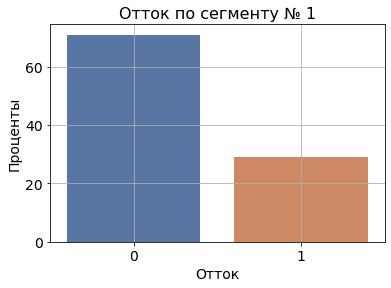

In [49]:
segment_1_churn = segment_1.groupby('churn')['user_id'].count().sort_values(ascending=False).reset_index()
segment_1_churn['percentage'] = round(100 * segment_1_churn['user_id'] / segment_1_churn['user_id'].sum())
display(segment_1_churn)

# Визуализируем с помощью графика
sns.barplot(data=segment_1_churn,
        x='churn',
        y='percentage')
    # Настраиваем заголовок и названия осей
plt.title(f'Отток по сегменту № 1', fontsize=16)
plt.tick_params(labelsize=14)
plt.xlabel('Отток', fontsize=14)
plt.ylabel('Проценты', fontsize=14)
plt.grid(True)

Сгруппируем данные по оттоку в сегменте № 2 и найдем процентное соотношение

,churn,user_id,percentage
0,0,346,66.00
1,1,177,34.00


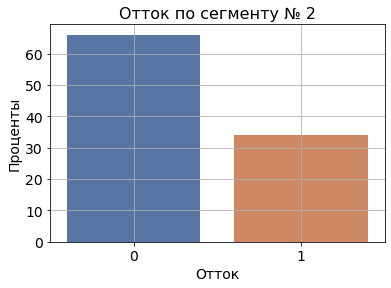

In [50]:
segment_2_churn = segment_2.groupby('churn')['user_id'].count().sort_values(ascending=False).reset_index()
segment_2_churn['percentage'] = round(100 * segment_2_churn['user_id'] / segment_2_churn['user_id'].sum())
display(segment_2_churn)

# Визуализируем с помощью графика
sns.barplot(data=segment_2_churn,
        x='churn',
        y='percentage')
    # Настраиваем заголовок и названия осей
plt.title(f'Отток по сегменту № 2', fontsize=16)
plt.tick_params(labelsize=14)
plt.xlabel('Отток', fontsize=14)
plt.ylabel('Проценты', fontsize=14)
plt.grid(True)

Сгруппируем данные по оттоку в сегменте № 3 и найдем процентное соотношение

,churn,user_id,percentage
0,1,534,51.00
1,0,513,49.00


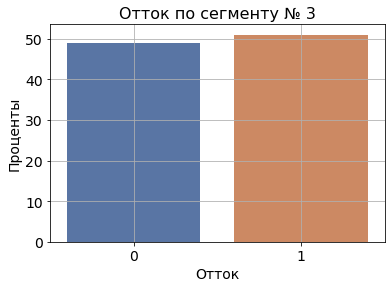

In [51]:
segment_3_churn = segment_3.groupby('churn')['user_id'].count().sort_values(ascending=False).reset_index()
segment_3_churn['percentage'] = round(100 * segment_3_churn['user_id'] / segment_3_churn['user_id'].sum())
display(segment_3_churn)

# Визуализируем с помощью графика
sns.barplot(data=segment_3_churn,
        x='churn',
        y='percentage')
    # Настраиваем заголовок и названия осей
plt.title(f'Отток по сегменту № 3', fontsize=16)
plt.tick_params(labelsize=14)
plt.xlabel('Отток', fontsize=14)
plt.ylabel('Проценты', fontsize=14)
plt.grid(True)

Исходя из графиков видно, что в первую очередь необходимо уделить внимание на сегмент № 3, в котором отточность составляет 51%, далее на сегмент № 2 с отточностью 34% и в конце на сегмент № 1 с отточностью 29%.

## Общий вывод и рекомендации

**1.** На входе мы получили файл с данными о 10000 клиентах Метанпромбанка.  

**2.** На подготовительном этапе были выполнены следующие действия:  

- названия столбцов user_id и est_salary приведены к общему виду  
- удалены пропуски из столбца age, т.к. количество пропусков слишком мало - всего 0.26%  
- выявлено, что в столбце balance 22.8% пропусков от всех данных и мы наблюдаем зависимость со столбцом equity. По этой причине пропуски в balance не заполнялись, чтобы не привести к искажению данных  
- найдены дубликаты в user_id, но мы видим, что один id присвоен разным людям, поэтому удалять их нельзя  
- изменён тип данных в age с float на int  
- выполнена кодировка столбцов gender и city  

**3.** Далее проведен исследовательский анализ данных.  

В части оттока клиентов были выявлены следующие особенности 
- отток клиентов по признаку score находится в диапазоне значений 820-940.  
- в части городов, отток клиентов в Рыбинске ниже среднего значения, в остальных городах отток выше среднего уровня оттока. Ярославль находится на первом месте по оттоку.  
- в части пола, отток мужчин около 24%, в то время как женщин 13% и вляется ниже среднего.  
- отток клиентов по возрасту виден в двух диапазонах: с 25 до 36 и с 50 до 61.  
- в части признака equity (баллов собственности) отток клиентов выше средних значений начинается с 3 баллов.  
- отток клиентов в признаке balance начинается с 700 тыс.  
- при наличии у клиентов 2 и более продуктов отток клиентов находится выше среднего. У клиентов с 4 продуктами отток составляет более 60%.  
- среди клиентов у которых нет кредитной карты отток составляет более 25%. Отток клиентов с кредитной картой меньше среднего и находится чуть ниже 15%.  
- отток активных клиентов около 24%.  
- наибольший отток клиентов в части esl_salary (доход клиента) назодится в диапазоне 100-220 тыс.  
- По шкале Чеддока корреляция оттока не имеет связей с est_salary, balance и city.  
Слабая связь выявлена с last_activity (0.26), products (0.26), score (0.23), gender (0.22), credit_card (0.2) и age (0.19).  
Умеренная связь выявлена с equity (0.35). 

**4.** Получили результат по двум гипотезам:  

- доход ушедших клиентов не равен доходу активных клиентов.
- среднее количество баллов собственности у отточных клиентов не равно количеству баллов собственности у не отточных клиентов.  

**5.** В завершении разделили клиентов на 3 сегмента по оттоку:  

Сегмент № 1: Пол - Мужской, Возраст - 25-36, Продукты - 2  
Сегмент № 2: Пол - Мужской, Город - Ярославль, Баллы собственности - 4  
Сегмент № 3: Пол - Мужской, Кредитный скоринг - 820-940, Баланс - 700+ тыс.  

Далее построили диаграммы оттока по сегментам и приоритизировали их.  
В первую очередь необходимо уделить внимание на сегмент № 3, в котором отточность составляет 51%, далее на сегмент № 2 с отточностью 34% и в конце на сегмент № 1 с отточностью 29%.  

**Рекомендации**  

У клиентов из сегмента № 3 мы видим хороший кредитный скоринг и большой баланс на счету. Могу рекомендовать разработать для них выгодную программу вкладов, а также персональные предложения пользования дебетовыми/кредитными картами банка.  

Клиентам из сегмента № 2, у которых 4 балла собственности, можно рекомендовать кредиты на выгодных условиях. Есть вероятность, что они захотят еще что-либо приобрести и таким образом продолжат пользоваться услугами банка.  

Для клиентов сегмента № 1, которые как мы видим в молодом возрасте и у которых еще мало продуктов банка, можно порекомендовать дебетовые/кредитные карты с различными кешбэк опциями в том числе на путешествия.

### Материалы

Презентация Анализа оттока клиентов "Метанпромбанка"  
https://disk.yandex.ru/i/mK83xBStshcPUw